In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import optimize
import sympy

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
columnas=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
#header=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
dataf = pd.read_csv("/content/drive/MyDrive/kp/profundidad/tablafscore_at_eat.txt",sep='\t',index_col=False)#,usecols=columnas)
dataf.describe()
dataf.head(20)

,Porcentaje,ERR2929690,ERR2929692,SRR2244244,SRR3465557,SRR4025861,SRR4245476,SRR5146463,SRR5167853,SRR5168236,SRR5168385,SRR5168393,SRR5168488,SRR5714002,SRR6348595,SRR6514141,SRR6514350,SRR6519357,SRR6675860,SRR8175017,SRR8607449,SRR8607459,SRR8607467,SRR8778550
0,1.500,0.428571,0.320000,0.225806,0.148148,0.294118,0.352941,0.242424,0.125000,0.526316,0.311111,0.285714,0.245614,0.421053,0.200000,0.5,0.235294,0.190476,0.222222,0.833333,0.375000,0.297872,0.551724,0.3125
1,1.515,0.428571,0.320000,0.225806,0.148148,0.294118,0.352941,0.242424,0.125000,0.526316,0.311111,0.285714,0.245614,0.421053,0.200000,0.5,0.235294,0.190476,0.222222,0.833333,0.375000,0.297872,0.551724,0.3125
2,1.530,0.428571,0.320000,0.225806,0.148148,0.294118,0.352941,0.242424,0.125000,0.526316,0.311111,0.285714,0.245614,0.421053,0.200000,0.5,0.228346,0.190476,0.222222,0.833333,0.375000,0.297872,0.551724,0.3125
3,1.545,0.428571,0.320000,0.225806,0.148148,0.294118,0.352941,0.242424,0.125000,0.526316,0.311111,0.285714,0.245614,0.410596,0.200000,0.5,0.224852,0.190476,0.222222,0.833333,0.375000,0.297872,0.551724,0.3125
4,1.560,0.428571,0.320000,0.225806,0.148148,0.294118,0.352941,0.242424,0.125000,0.526316,0.311111,0.285714,0.245614,0.404255,0.200000,0.5,0.222749,0.190476,0.222222,0.833333,0.375000,0.297872,0.551724,0.3125
5,1.575,0.428571,0.320000,0.225806,0.148148,0.294118,0.352941,0.242424,0.125000,0.526316,0.311111,0.285714,0.245614,0.400000,0.200000,0.5,0.221344,0.190476,0.222222,0.833333,0.375000,0.297872,0.551724,0.3125
6,1.590,0.428571,0.320000,0.225806,0.148936,0.294118,0.352941,0.242424,0.125000,0.526316,0.311111,0.285714,0.245614,0.396947,0.200000,0.5,0.220339,0.190476,0.222222,0.833333,0.371365,0.298780,0.551724,0.3125
7,1.605,0.428571,0.320000,0.225806,0.149533,0.294118,0.352941,0.242424,0.125000,0.526316,0.311111,0.285714,0.245614,0.394649,0.200000,0.5,0.219585,0.190476,0.222222,0.833333,0.368627,0.299465,0.551724,0.3125
8,1.620,0.428571,0.320000,0.225806,0.150000,0.294118,0.352941,0.242424,0.121951,0.526316,0.311111,0.285714,0.245614,0.392857,0.200000,0.5,0.218997,0.190476,0.222222,0.833333,0.366492,0.300000,0.551724,0.3125
9,1.635,0.428571,0.320000,0.225806,0.150376,0.294118,0.352941,0.242424,0.119497,0.526316,0.311111,0.285714,0.245614,0.391421,0.200000,0.5,0.218527,0.190476,0.222222,0.833333,0.364780,0.300429,0.551724,0.3125


In [4]:
nom=['ERR2929690','ERR2929692','SRR2244244','SRR3465557','SRR4025861','SRR4245476','SRR5146463','SRR5167853','SRR5168236','SRR5168385','SRR5168393','SRR5168488','SRR5714002','SRR6348595','SRR6514141','SRR6514350','SRR6519357','SRR6675860','SRR8175017','SRR8607449','SRR8607459','SRR8607467','SRR8778550']
coll=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)


([<matplotlib.axis.XTick at 0x7f44af05bfd0>,
 [Text(0, 0, '1.5'),
  Text(0, 0, '1.5'),
  Text(0, 0, '1.5'),
  Text(0, 0, '1.5'),
  Text(0, 0, '1.6'),
  Text(0, 0, '1.6'),
  Text(0, 0, '1.6'),
  Text(0, 0, '1.6'),
  Text(0, 0, '1.6'),
  Text(0, 0, '1.6'),
  Text(0, 0, '1.6'),
  Text(0, 0, '1.7'),
  Text(0, 0, '1.7'),
  Text(0, 0, '1.7'),
  Text(0, 0, '1.7'),
  Text(0, 0, '1.7'),
  Text(0, 0, '1.7'),
  Text(0, 0, '1.8'),
  Text(0, 0, '1.8'),
  Text(0, 0, '1.8'),
  Text(0, 0, '1.8'),
  Text(0, 0, '1.8'),
  Text(0, 0, '1.8'),
  Text(0, 0, '1.8'),
  Text(0, 0, '1.9'),
  Text(0, 0, '1.9'),
  Text(0, 0, '1.9'),
  Text(0, 0, '1.9'),
  Text(0, 0, '1.9'),
  Text(0, 0, '1.9'),
  Text(0, 0, '1.9'),
  Text(0, 0, '2.0'),
  Text(0, 0, '2.0'),
  Text(0, 0, '2.0'),
  Text(0, 0, '2.0'),
  Text(0, 0, '2.0'),
  Text(0, 0, '2.0'),
  Text(0, 0, '2.1'),
  Text(0, 0, '2.1'),
  Text(0, 0, '2.1'),
  Text(0, 0, '2.1'),
  Text(0, 0, '2.1'),
  Text(0, 0, '2.1'),
  Text(0, 0, '2.1'),
  Text(0, 0, '2.2'),
  Text(0, 

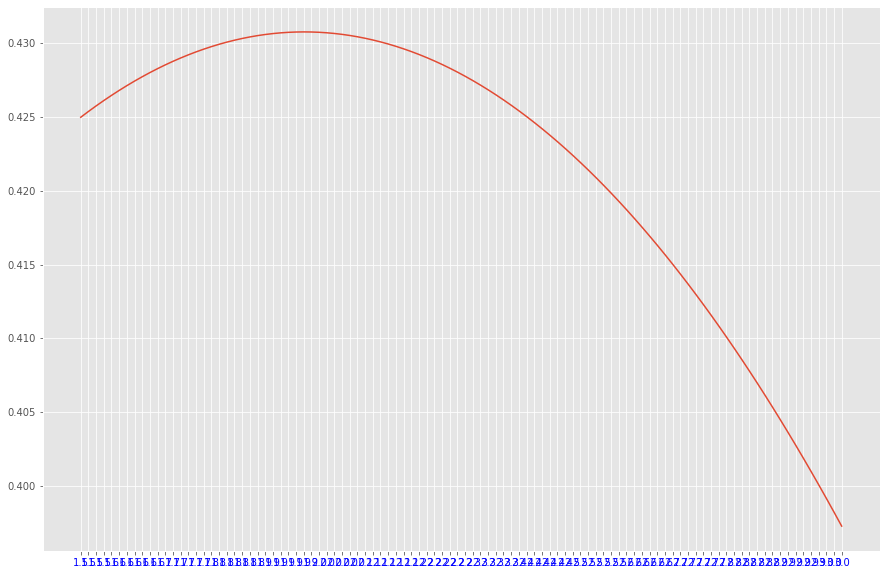

In [25]:

tabla_maximosf=[]
Error_modelosf=[]
grado=PolynomialFeatures(degree=2)
X_train, X_test, y_train, y_test = train_test_split(dataf.iloc[:,:1], dataf.iloc[:,1], test_size=0.33, random_state=42)
x_train_p=grado.fit_transform(X_train)
x_test_p=grado.fit_transform(X_test)
#print(x_test_p[0])
X_t = sm.add_constant(x_train_p, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_t,)
modelo = modelo.fit()
coef=modelo.params[:3]
#print(coef)
#print(coef[0])
#print(coef[1])
#print(coef[2])
X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
predicciones = modelo.predict(exog = X_te)
rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
#print(f"El error (rmse) de test es: {rmse}")
Error_modelosf.append(rmse)
def f(x):
  return -(coef[0]+coef[1]*x+coef[2]*x**2)
optimo=optimize.minimize(f,(1.75),tol=1e-5,method='CG',bounds=((1.5,3)))
#print(optimo.fun)
#print(optimo.x)
#graficar funcion
xd=np.arange(1.5,3,0.015)
plt.figure(figsize=(15,10))
plt.plot(xd, [-f(i) for i in xd])
vals=[]
for v in xd:
  vals.append("{:.1f}".format(v))
#plt.set_xticklabels(vals)
plt.xticks(xd,vals, color = 'b')

#plt.plot(optimo.x,optimo.fun,color='r', marker='x')

In [8]:
vals=range(1500,3000,15)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: Runt

[array([-2.93494439e+08]), array([-4.38395842e+08]), array([3.6149313e+08]), array([0.10545542]), array([-4.24736317e+08]), array([-4.16860398e+08]), array([-3.57119694e+08]), array([-4.21005385e+08]), array([3.6149313e+08]), array([3.6149313e+08]), array([3.6149313e+08]), array([3.6149313e+08]), array([1.06538985e-09]), array([3.6149313e+08]), array([3.6149313e+08]), array([3.6149313e+08]), array([3.35281121e-06]), array([3.6149313e+08]), array([-9.64580059e-05]), array([-4.14160987e+08]), array([3.6149313e+08]), array([3.6149313e+08])]


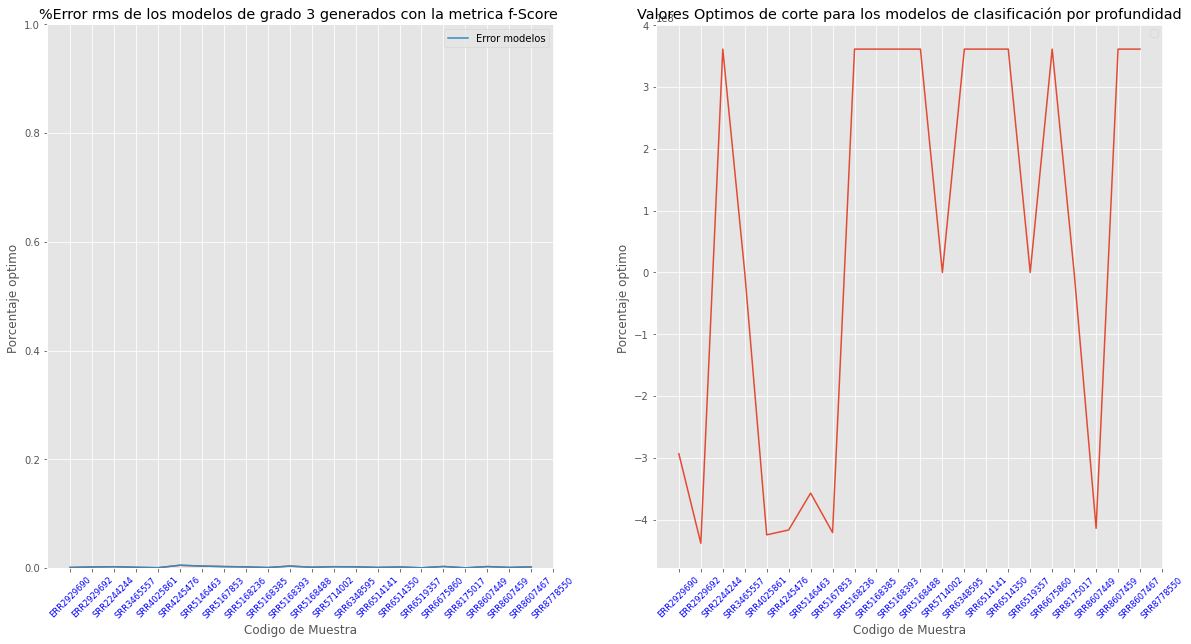

In [ ]:

tabla_maximosf=[]
Error_modelosf=[]
pf = PolynomialFeatures(degree = 3)
for col in range(1,23):
  X_train, X_test, y_train, y_test = train_test_split(dataf.iloc[:,:1], dataf.iloc[:,col], test_size=0.33, random_state=42)
  X = pf.fit_transform(X_train)  # transformamos la entrada en polinómica
  x_test_p=pf.fit_transform(X_test)
  regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
  regresion_lineal.fit(X, y_train) 
  #print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
  coef=regresion_lineal.coef_
  corte=regresion_lineal.intercept_
  #print(coef)
  X_te = sm.add_constant(x_test_p, prepend=True)
  prediccion_entrenamiento = regresion_lineal.predict(X_te)
  mse = mean_squared_error(y_true = y_test, y_pred = prediccion_entrenamiento)
  rmse = np.sqrt(mse)
  Error_modelosf.append(rmse)
  #print('Error Cuadrático Medio (MSE) = ' + str(mse))
  #print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
  def f(x):
    return -(corte+coef[0]*x+coef[1]*x**2+coef[3]*x**3)
  optimo=optimize.minimize(f,(50),tol=1e-5,method='CG',bounds=((0,100),))
  tabla_maximosf.append(optimo.x)
print(tabla_maximosf)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(Error_modelosf)
plt.title("%Error rms de los modelos de grado 3 generados con la metrica f-Score ")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(Error_modelosf, label = "Error modelos")
plt.ylim(0,1)
plt.legend()
plt.subplot(1,2,2)
plt.plot(tabla_maximosf)
#mediaid=(np.ones_like(identidad))*(np.sum(identidad)/len(identidad))
#plt.plot(mediaid)
#mediacov=(np.ones_like(covertura))*(np.sum(covertura)/len(covertura))
#plt.plot(mediacov)
plt.title("Valores Optimos de corte para los modelos de clasificación por profundidad")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
#plt.ylim(0,100)
#plt.plot(identidad, label = "% 2std")
#plt.plot(mediaid, label = "Media ID: "+str(mediaid[0]))
#plt.plot(mediacov, label = "Media Cov: "+str(mediacov[0]))
plt.legend()

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:522: Runt

[1.93595729]
[2.26987982]
[1.39341262]
[2.29699285]
[2.66670658]
[-4.682445e+08]
[-4.19533342e+08]
[-3.8971194e+08]
[-5.67324012]
[1.56883986]
[-3.88277374e+08]
[-6.23688148e+08]
[-2.27939715e+08]
[-3.18610416]
[-4.82090238e+08]
[-27.43915149]
[2.00515684]
[-4.29275476e+08]
[2.07890217]
[-6.70129513e+08]
[1.73959547]
[-4.02033876e+08]


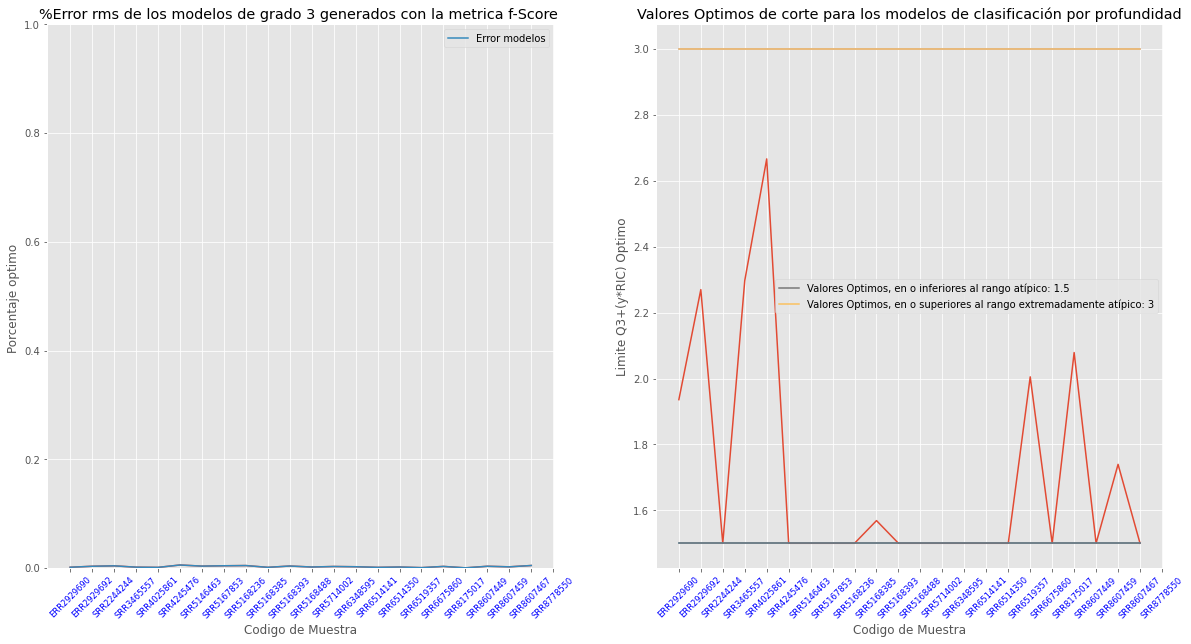

In [ ]:
tabla_maximosf=[]
Error_modelosf=[]
grado=PolynomialFeatures(degree=2)
for col in range(1,23):
  X_train, X_test, y_train, y_test = train_test_split(dataf.iloc[:,:1], dataf.iloc[:,col], test_size=0.33, random_state=42)
  x_train_p=grado.fit_transform(X_train)
  x_test_p=grado.fit_transform(X_test)
  #print(x_test_p[0])
  X_t = sm.add_constant(x_train_p, prepend=True)
  modelo = sm.OLS(endog=y_train, exog=X_t,)
  modelo = modelo.fit()
  coef=modelo.params[:3]
  #print(coef)
  #print(coef[0])
  #print(coef[1])
  #print(coef[2])
  X_te = sm.add_constant(x_test_p, prepend=True)#evaluación de los modelos
  predicciones = modelo.predict(exog = X_te)
  rmse = mean_squared_error(y_true=y_test,y_pred  = predicciones,squared = False)
  #print(f"El error (rmse) de test es: {rmse}")
  Error_modelosf.append(rmse)
  def f(x):
    return -(coef[0]+coef[1]*x+coef[2]*x**2)
  optimo=optimize.minimize(f,(1.8),tol=1e-5,method='CG',bounds=(1.5,3))
  print(optimo.x)
  if optimo.x<1.5:
    tabla_maximosf.append(1.5)
  elif optimo.x>3:
    tabla_maximosf.append(3)
  else:
    tabla_maximosf.append(optimo.x)
#print(tabla_maximosf)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(Error_modelosf)
plt.title("%Error rms de los modelos de grado 3 generados con la metrica f-Score ")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Porcentaje optimo ")
plt.plot(Error_modelosf, label = "Error modelos")
plt.ylim(0,1)
plt.legend()
plt.subplot(1,2,2)
plt.plot(tabla_maximosf)
atipico=(np.ones_like(tabla_maximosf))*1.5#(np.sum(tabla_maximosf)/len(tabla_maximosf))
e_atipico=(np.ones_like(tabla_maximosf))*3
plt.plot(atipico)
plt.plot(e_atipico)
#mediaid=(np.ones_like(identidad))*(np.sum(identidad)/len(identidad))
#plt.plot(mediaid)
#mediacov=(np.ones_like(covertura))*(np.sum(covertura)/len(covertura))
#plt.plot(mediacov)
plt.title("Valores Optimos de corte para los modelos de clasificación por profundidad")   # Establece el título del gráfico
plt.xlabel("Codigo de Muestra")   # Establece el título del eje x
plt.xticks(coll,nom,size = 'small', color = 'b', rotation = 45)
plt.ylabel("Limite Q3+(y*RIC) Optimo")
plt.plot(atipico, label = "Valores Optimos, en o inferiores al rango atípico: "+str(atipico[0]))
plt.plot(e_atipico, label = "Valores Optimos, en o superiores al rango extremadamente atípico: "+str(e_atipico[0]))
#plt.ylim(0,100)
#plt.plot(identidad, label = "% 2std")
#plt.plot(mediaid, label = "Media ID: "+str(mediaid[0]))
#plt.plot(mediacov, label = "Media Cov: "+str(mediacov[0]))
plt.legend()
  